In [1]:
from eiscirc import ImpedanceModel
import numpy as np
import matplotlib.pyplot as plt

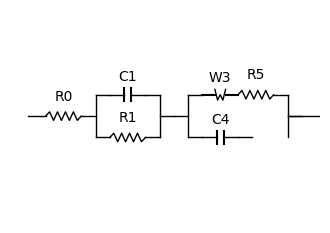

('series',
 'R0',
 ('parallel', 'R1', 'C1'),
 ('parallel', 'C4', ('series', 'W3', 'R5')))

In [2]:
model = ImpedanceModel("R0-R1//C1-C4//(W3-R5)")
fig = model.draw_circuit(size=(4, 3))
plt.show()
model.circuit_structure

C:\Users\mlp\AppData\Local\Temp\ipykernel_10444\2738162011.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


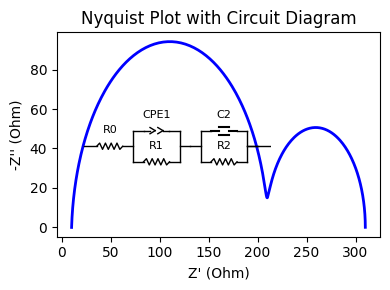

In [33]:
model = ImpedanceModel("R0-R1//CPE1-R2//C2")
omega = 2 * np.pi * np.logspace(-3, 8, 1000)  # 10 Hz to 1 MHz in rad/s
Z = model.impedance(omega, R0=1e1, R1=2e2, CPE1=(1e-6,0.96), R2=1e2, C2=1e-3)

# Create main plot
fig, ax = plt.subplots(figsize=(4, 3))

ax.plot(Z[:1000], -Z[1000:], 'b-', linewidth=2)
ax.set_xlabel('Z\' (Ohm)')
ax.set_ylabel('-Z\'\' (Ohm)')
ax.set_title('Nyquist Plot with Circuit Diagram')

# Add circuit as inset
model.draw_circuit(ax=ax,position=[2., 2], loc = 2)

plt.tight_layout()
plt.show()

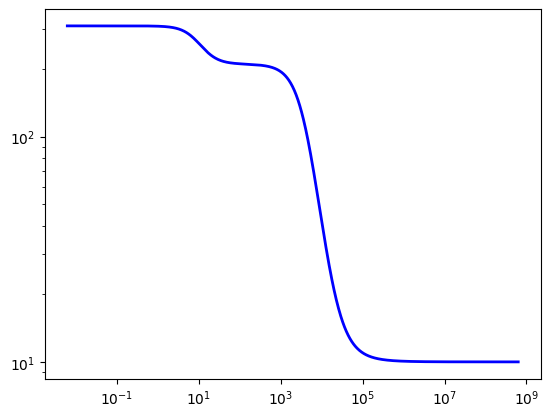

In [24]:
plt.loglog(omega, Z[:1000], 'b-', linewidth=2)